In [89]:
import cv2
import skimage as sk
from skimage import data, io, filters, exposure
import numpy as np
import skimage.morphology as mp


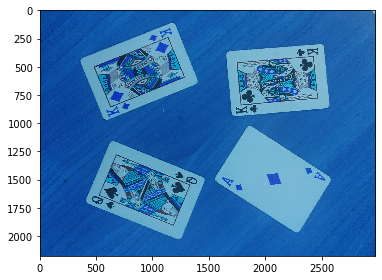

In [90]:

image = cv2.imread("cardsOnFloor.jpg",cv2.IMREAD_UNCHANGED)
io.imshow(image)
cv2.resize(image, (400, 600)) 
io.imshow(image)

array([[ 89,  89,  89, ..., 200, 200, 200],
       [ 89,  88,  88, ..., 200, 200, 200],
       [ 89,  89,  88, ..., 200, 200, 199],
       ...,
       [ 94,  94,  94, ...,  91,  90,  90],
       [ 94,  94,  94, ...,  91,  90,  89],
       [ 94,  94,  94, ...,  90,  89,  88]], dtype=uint8)

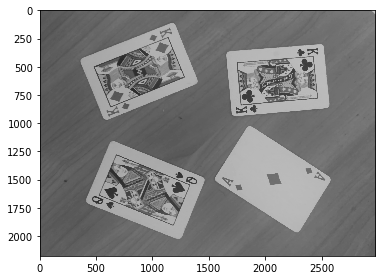

In [91]:
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayimage = cv2.medianBlur(grayimage,11) #rozmycie pomaga w usunięciu krawędzi zbędnych krawędzi
io.imshow(grayimage)
grayimage


(2176, 2975)

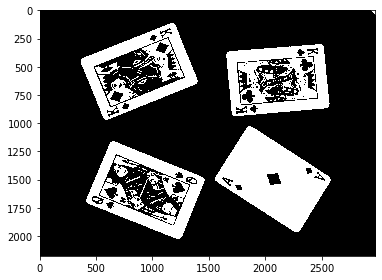

In [92]:
threshold, thresholdedImage = cv2.threshold(grayimage, 127, 255, cv2.THRESH_OTSU) #THRESH_OTSU sam dobiera próg na podstawie rozkładu kolorów(zakłada,że jest bimodalny), drugi argument nie ma znaczenia XD
io.imshow(thresholdedImage)
thresholdedImage.shape

In [93]:
def compareWithRectangle(contour): #ważne, dla danego konturu dobieramy najlepiej pasujący do niego prostokąt, następnie porównujemy powierzchnie konturu z powierzchnią prostokątu
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    return (cv2.contourArea(contour)/cv2.contourArea(box))


[[1243 2043]
 [ 397 1701]
 [ 621 1145]
 [1467 1487]]


[array([[1243, 2043],
       [ 397, 1701],
       [ 621, 1145],
       [1467, 1487]], dtype=int64)]
[[1183 1912]
 [ 515 1640]
 [ 666 1270]
 [1334 1542]]


[array([[1183, 1912],
       [ 515, 1640],
       [ 666, 1270],
       [1334, 1542]], dtype=int64)]
[[2282 1981]
 [1534 1500]
 [1847 1012]
 [2596 1493]]


[array([[2282, 1981],
       [1534, 1500],
       [1847, 1012],
       [2596, 1493]], dtype=int64)]
[[1697  943]
 [1645  367]
 [2515  289]
 [2566  866]]


[array([[1697,  943],
       [1645,  367],
       [2515,  289],
       [2566,  866]], dtype=int64)]
[[1773  845]
 [1738  461]
 [2428  399]
 [2463  783]]


[array([[1773,  845],
       [1738,  461],
       [2428,  399],
       [2463,  783]], dtype=int64)]
[[ 568  983]
 [ 347  435]
 [1186   98]
 [1406  645]]


[array([[ 568,  983],
       [ 347,  435],
       [1186,   98],
       [1406,  645]], dtype=int64)]
[[ 617  866]
 [ 470  499]
 [1139  231]
 [1286  598]]


[array([[ 617, 

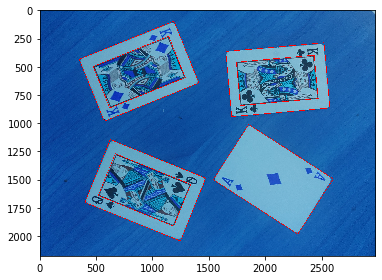

In [98]:
contours,b = cv2.findContours(thresholdedImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #znajdujemy kontury
cntfiltered = [x for x in contours if cv2.contourArea(x) > 1000 and compareWithRectangle(x) > 0.9] #filtrujemy do takich, które są dostatecznie duze i które mają prostokątny kształt
colors = ((255,0,0),(0,255,0),(0,0,255),(124,0,200),(124,0,200),(124,0,200)) #jakieś przykładowe kolory do wizualizacji
boxes = []
for i,x in enumerate(cntfiltered): #wizualizacja efektu
    rect = cv2.minAreaRect(x)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    print(box)
    print("\n")
    print([box])

    cv2.drawContours(image,[box],-1,colors[0],3)
    
io.imshow(image)
